In [39]:
import pandas as pd  # hacemos todas las importaciones necesarias para el ejercicio
import numpy as np          
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_csv('archivos_customer/Customer Flight Activity.csv',index_col= 0) # Abrimos csv para lectura 


In [88]:
df.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [89]:
df.info() # Para obtener un resumen detallado de la info que tengo en el DF

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


# Resumen de la info obtenida, a partir de aqui debo definir que hacer con estos datos. 
Tipo de Objeto
Estructura que organiza datos en formato tabular (filas y columnas).
Índice
Index: 405624 entries, 100018 to 999986: Hay 405,624 entradas (filas) en el DataFrame. Los índices van desde 100018 hasta 999986. Esto significa que los índices no son secuenciales, sino que se están utilizando índices personalizados.
Columnas
Data columns (total 9 columns): El DataFrame tiene un total de 9 columnas.
# 📌 Detalles de las Columnas Cada columna se muestra con su número de índice, nombre, conteo de valores no nulos (Non-Null Count), y tipo de dato (Dtype):
#: Es el número del índice de la columna.
Column: Nombre de la columna.
Non-Null Count: Muestra cuántos valores en esa columna no son nulos. En tu caso, todas las columnas tienen 405,624 valores no nulos, lo que significa que no hay datos faltantes en ninguna columna.
Dtype: El tipo de datos de cada columna. Tienes 8 columnas de tipo int64 (enteros) y 1 columna de tipo float64 (números decimales).


In [90]:
df.isnull().sum() # Verificacion de los valores nulos por columnas.


Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [91]:
df.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [92]:
#Unir el conjunto de datos en un solo csv para poder analizar la totalidad de los datos de manera mas eficiente 
df2=pd.read_csv('archivos_customer/Customer Loyalty History.csv',index_col= 0) # Abrimos  el segundo csv para lectura 


In [93]:
#combinar df utilizando merge
df_merged= pd.merge(df2,df,on='Loyalty Number', how= 'right')

# 📌 df2 y df: Son los dos DataFrames que se están combinando. 
Se pretende unir df2 con df en función de la columna común "Loyalty Number".

on='Loyalty Number': especifica que el merge se debe realizar basándose en la columna "Loyalty Number" que debe estar presente en ambos DataFrames.Servirá como la clave para la combinación.

how='right': Este parámetro indica el tipo de combinación que se quiere realizar. En este caso, se está utilizando una combinación "right" (o "derecha"). Esto significa que se conservarán todas las filas de df, y solo se incluirán las filas de df2 que tienen coincidencias en la columna "Loyalty Number". Si no hay coincidencias en df2, los valores correspondientes de df2 se llenarán con NaN (Not a Number).

Ventajas de usar este método:

Combinación de datos: Permite unir datos provenientes de diferentes fuentes de una manera ordenada y eficiente, lo que es útil para análisis más complejos.

Flexibilidad en tipos de uniones: La opción "right" (así como "left", "inner" o "outer") proporciona flexibilidad sobre cómo se debe realizar la combinación en función de las necesidades específicas del análisis.

Manejo de datos faltantes: Al realizar un merge, se pueden fácilmente identificar y manejar valores faltantes (representados como NaN), lo que puede ser útil para tratamiento posterior de datos.

Integridad de datos: Al combinar datos en base a una columna clave, se mantiene la relación lógica entre las diferentes fuentes de datos, lo que ayuda a preservar la integridad de la información.

En resumen, el uso de pd.merge() con how='right' es conveniente cuando se desea asegurar que todos los registros de un DataFrame (en este caso df) estén presentes en el resultado, independientemente de si existen coincidencias en el otro DataFrame (df2).

In [94]:
#Hacemos exploracion inicial de todos los datos que tenemos, una vez unido los dos df
df_merged.head()


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0
100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200,120.0,0,0
100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


In [95]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      405624 non-null  object 
 1   Province                     405624 non-null  object 
 2   City                         405624 non-null  object 
 3   Postal Code                  405624 non-null  object 
 4   Gender                       405624 non-null  object 
 5   Education                    405624 non-null  object 
 6   Salary                       302952 non-null  float64
 7   Marital Status               405624 non-null  object 
 8   Loyalty Card                 405624 non-null  object 
 9   CLV                          405624 non-null  float64
 10  Enrollment Type              405624 non-null  object 
 11  Enrollment Year              405624 non-null  int64  
 12  Enrollment Month             405624 non-null  int64  
 13 

 # La columna salary tiene valores negativos 
 # Salary, CLV,Enrollment Month, Cancellatiom Month, Years
 # MArital status tiene numeros y letras 

In [96]:
# Estadísticas descriptivas
df_merged.describe()

,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,302952.000000,405624.000000,405624.000000,405624.000000,50064.000000,50064.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,79268.825953,7991.976226,2015.252529,6.668008,2016.499521,6.966443,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,34992.133508,6863.663857,1.979427,3.399766,1.384336,3.448300,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59262.000000,3985.320000,2014.000000,4.000000,2016.000000,4.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73479.000000,5776.340000,2015.000000,7.000000,2017.000000,7.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,88612.000000,8936.820000,2017.000000,10.000000,2018.000000,10.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


Limpieza de Datos 

In [97]:
df_merged.isnull().sum() #Verificacion de valores nulos 

Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

In [98]:
# Manejo de valores nulos  
# Porcentaje de datos nulos  por columna
valores_nulos = df_merged.isnull().mean() * 100
print(valores_nulos[valores_nulos > 0])



Salary                25.312112
Cancellation Year     87.657535
Cancellation Month    87.657535
dtype: float64


In [116]:
# Rellenar valores nulos con la media para columnas numéricas y comprobamos que efectivamente no tengamos nulos.
df_merged['Salary'] = df_merged['Salary'].fillna(df_merged['Salary'].mean())
nulos_finales = df_merged['Salary'].isnull().sum()
print(f"Número de valores nulos en 'salario' después de eliminar: {nulos_finales}")

Número de valores nulos en 'salario' después de eliminar: 0


In [117]:
# Eliminacion de valores nulos para las columnas Cancellation Year , Cancellation Month

# Eliminar filas con valores nulos
df = df.dropna()  #De momneto no me interesa hacer cambio s en estas columnas 


In [118]:
# Verificar los valores únicos en ciertas columnas
print(df_merged['Gender'].unique())
print(df_merged['Marital Status'].unique())
print(df_merged['Postal Code'].unique()) 

['Female' 'Male']
['Married' 'Single' 'Divorced']
['T9G 1W3' 'M1R 4K3' 'U5I 4F1' 'V5R 1W3' 'P1L 8X8' 'P1J 8T7' 'S6J 3G0'
 'H2T 9K8' 'V6E 3D9' 'M5V 1G5' 'H2Y 4R4' 'M8Y 4K8' 'V6E 3Z3' 'G1B 3L5'
 'T9O 2W2' 'A1C 6H9' 'H5Y 2S9' 'K1F 2R2' 'K8V 4B2' 'R3R 3T4' 'P1W 1K4'
 'K8T 5M5' 'V6V 8Z3' 'M2M 7K8' 'E3B 2H2' 'M5B 3E4' 'H2Y 2W2' 'P5S 6R4'
 'P2T 6G3' 'B3J 9S2' 'B3C 2M8' 'H4G 3T4' 'R6Y 4T5' 'H2T 2J6' 'M2Z 4K1'
 'S1J 3C5' 'E1A 2A7' 'V1E 4R6' 'T4V 1D4' 'M9K 2P4' 'R2C 0M5' 'T3G 6Y6'
 'M2M 6J7' 'V6T 1Y8' 'C1A 6E8' 'J8Y 3Z5' 'V10 6T5' 'H3T 8L4' 'T3E 2V9'
 'V09 2E9' 'Y2K 6R0' 'K1G 4Z0' 'M2P 4F6' 'M3R 4K8' 'H3J 5I6']


In [119]:
 #Ver los tipos de datos de las columnas
print(df_merged.dtypes)

Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object


In [122]:
# Convertir columnas categóricas
df_merged['Gender'] = df_merged['Gender'].astype('category')
df_merged['Marital Status'] = df_merged['Marital Status'].astype('category')
df_merged['Education'] = df_merged['Education'].astype('category')
print(df_merged.dtypes)

Country                          object
Province                         object
City                             object
Postal Code                      object
Gender                         category
Education                      category
Salary                          float64
Marital Status                 category
Loyalty Card                     object
CLV                             float64
Enrollment Type                  object
Enrollment Year                   int64
Enrollment Month                  int64
Cancellation Year               float64
Cancellation Month              float64
Year                              int64
Month                             int64
Flights Booked                    int64
Flights with Companions           int64
Total Flights                     int64
Distance                          int64
Points Accumulated              float64
Points Redeemed                   int64
Dollar Cost Points Redeemed       int64
dtype: object


Agregar columna de duplicados y eliminarlos 

# Fase #2

<Figure size 1200x600 with 0 Axes>

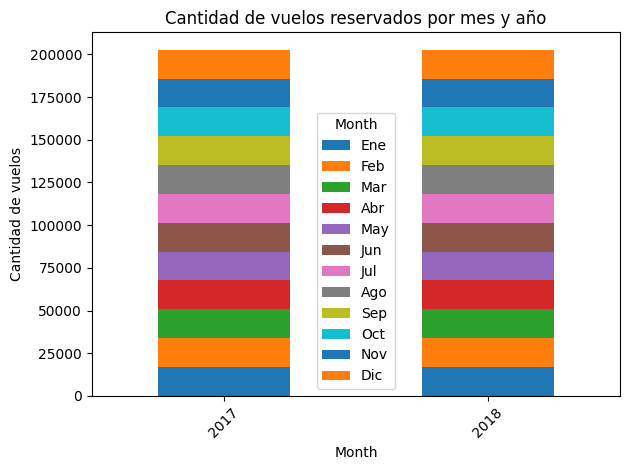

In [129]:
#1 

# Agrupar por año y mes, luego contar las reservas
vuelos_por_mes_año = df_merged.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Visualizar
plt.figure(figsize=(12, 6))
vuelos_por_mes_año.plot(kind='bar', stacked= True)  
plt.title('Cantidad de vuelos reservados por mes y año')
plt.xlabel('Month')
plt.legend(title='Month', labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
           
plt.ylabel('Cantidad de vuelos')
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()


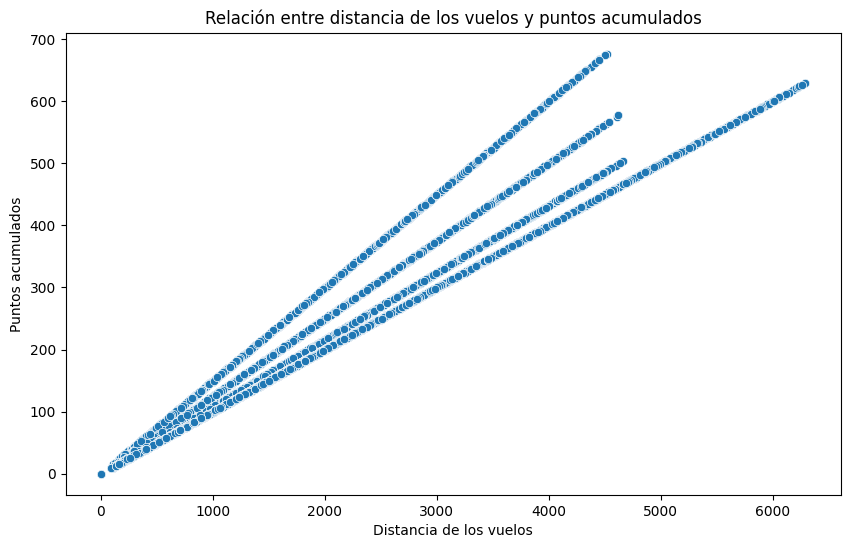

In [138]:
#2. ¿Existeunarelaciónentreladistanciadelosvuelosylospuntosacumuladosporlosclientes?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_merged)
plt.title('Relación entre distancia de los vuelos y puntos acumulados')
plt.xlabel('Distancia de los vuelos')
plt.ylabel('Puntos acumulados')
plt.show()


In [141]:
# Para contar la distribución de clientes por provincia
distribucion_provincia = df_merged['Province'].value_counts()

# Para contar la distribución de clientes por estado
distribucion_estado = df_merged['City'].value_counts()

# Si quieres ver la distribución en conjunto por provincia y estado
distribucion_conjunta = df_merged.groupby(['Province', 'City']).size().unstack(fill_value=0)

# Imprimir los resultados
print("Distribución de clientes por provincia:")
print(distribucion_provincia)

print("\nDistribución de clientes por estado:")
print(distribucion_estado)

print("\nDistribución conjunta de clientes por provincia y estado:")
print(distribucion_conjunta)


Distribución de clientes por provincia:
Province
Ontario                 130896
British Columbia        106848
Quebec                   79968
Alberta                  23400
Manitoba                 15984
New Brunswick            15432
Nova Scotia              12576
Saskatchewan              9936
Newfoundland              6312
Yukon                     2688
Prince Edward Island      1584
Name: count, dtype: int64

Distribución de clientes por estado:
City
Toronto           81096
Vancouver         62520
Montreal          49920
Winnipeg          15984
Whistler          14040
Halifax           12576
Ottawa            12312
Edmonton          11808
Trenton           11760
Quebec City       11760
Dawson Creek      10776
Fredericton       10344
Regina             9936
Kingston           9720
Tremblant          9600
Victoria           9504
Hull               8688
West Vancouver     7872
St. John's         6312
Thunder Bay        6264
Sudbury            5520
Moncton            5088
Calgary      

/var/folders/s1/9jz4rkw91fl6xfdl9tts_9wh0000gn/T/ipykernel_34044/520637584.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salario_promedio = df_merged.groupby('Education')['Salary'].mean()


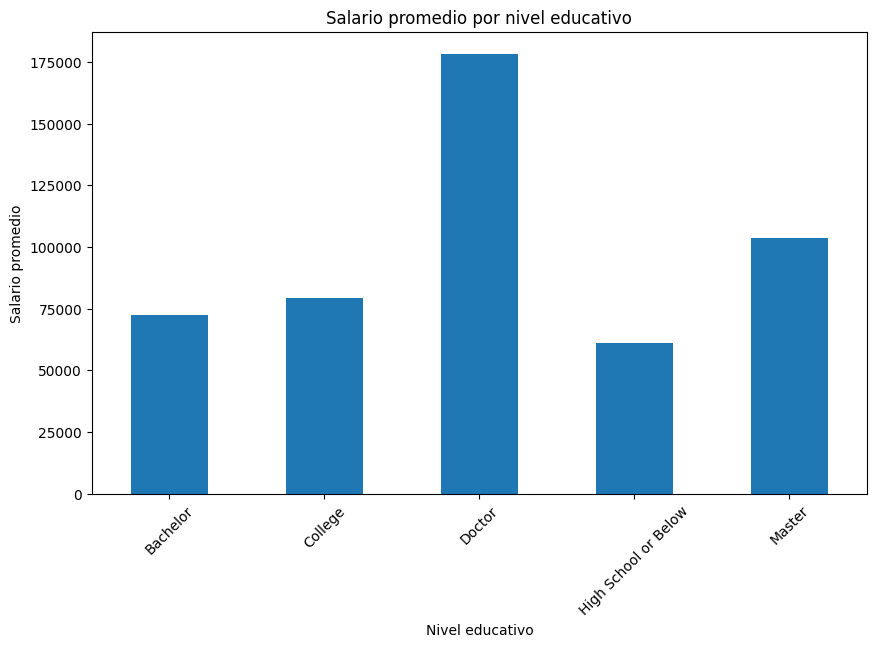

In [143]:
#4 ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
salario_promedio = df_merged.groupby('Education')['Salary'].mean()
plt.figure(figsize=(10, 6))
salario_promedio.plot(kind='bar')
plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)
plt.show()


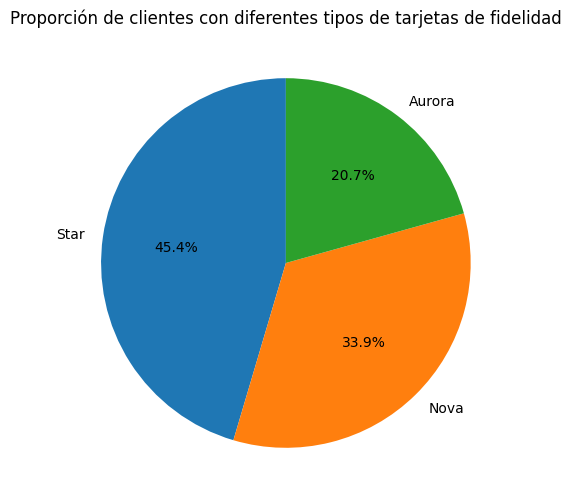

In [144]:
#5 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
tarjetas_proporcion = df_merged['Loyalty Card'].value_counts(normalize=True)
plt.figure(figsize=(10, 6))
tarjetas_proporcion.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporción de clientes con diferentes tipos de tarjetas de fidelidad')
plt.ylabel('')
plt.show()

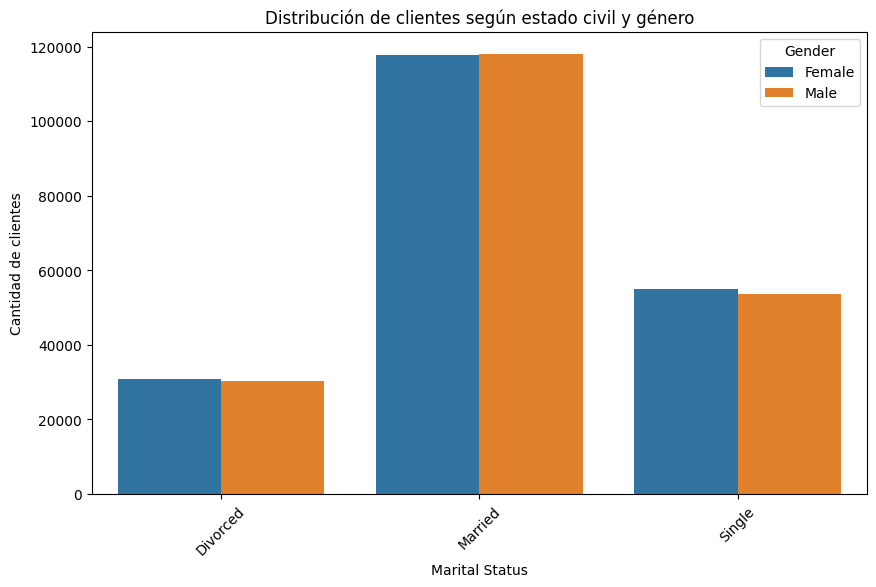

In [145]:
#6. ¿Cómo se distribuyen los clientes según su estado civil y género?
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', hue='Gender', data=df_merged)
plt.title('Distribución de clientes según estado civil y género')
plt.xlabel('Marital Status')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Fase3 


In [101]:
# Contar duplicados  (Ver que hacer con los duplicados )
duplicados = df_merged.groupby(list(df_merged.columns)).size().reset_index(name='counts')
duplicados = duplicados[duplicados['counts'] > 1]
print(duplicados)


      Country      Province      City Postal Code  Gender Education   Salary  \
1278   Canada       Alberta  Edmonton     T9G 1W3  Female  Bachelor  59663.0   
1279   Canada       Alberta  Edmonton     T9G 1W3  Female  Bachelor  59663.0   
1280   Canada       Alberta  Edmonton     T9G 1W3  Female  Bachelor  59663.0   
1281   Canada       Alberta  Edmonton     T9G 1W3  Female  Bachelor  59663.0   
1282   Canada       Alberta  Edmonton     T9G 1W3  Female  Bachelor  59663.0   
...       ...           ...       ...         ...     ...       ...      ...   
36150  Canada  Saskatchewan    Regina     S1J 3C5    Male  Bachelor  46831.0   
36151  Canada  Saskatchewan    Regina     S1J 3C5    Male  Bachelor  46831.0   
36152  Canada  Saskatchewan    Regina     S1J 3C5    Male  Bachelor  46831.0   
36153  Canada  Saskatchewan    Regina     S1J 3C5    Male  Bachelor  46831.0   
36154  Canada  Saskatchewan    Regina     S1J 3C5    Male  Bachelor  46831.0   

      Marital Status Loyalty Card      

In [ ]:
# LIMPIEZA DE DATOS :




# Imputar o eliminar valores nulos
# Por ejemplo, podrías llenar los valores nulos de 'Salary' con la media o mediana:
df['Salary'].fillna(df['Salary'].median(), inplace=True)

# Y eliminar las filas con valores nulos en 'Cancellation Year' y 'Cancellation Month'
df.dropna(subset=['Cancellation Year', 'Cancellation Month'], inplace=True)

# 2. Eliminar duplicados
df.drop_duplicates(inplace=True)

# 3. Revisar y corregir tipos de datos
# Puedes convertir 'Postal Code' a string si es numérico, por ejemplo:
df['Postal Code'] = df['Postal Code'].astype(str)

# 4. Normalizar datos (por ejemplo, convirtiendo a minúsculas y eliminando espacios)
df['Country'] = df['Country'].str.lower().str.strip()
df['Province'] = df['Province'].str.lower().str.strip()
df['City'] = df['City'].str.lower().str.strip()

# 5. Revisar outliers:
# Puedes utilizar métodos estadísticos para detectar outliers en 'Salary', por ejemplo:
q1 = df['Salary'].quantile(0.25)
q3 = df['Salary'].quantile(0.75)
iqr = q3 - q1
valid_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
df = df[(df['Salary'] >= valid_range[0]) & (df['Salary'] <= valid_range[1])]

# Finalmente, puedes guardar el DataFrame limpio a un nuevo archivo CSV si lo deseas
# df.to_csv('datos_limpios.csv', index=False)

